# Selection of the genes by de coedicient of variation and the mean

## Load the necessary libraries and open the dataframe

In [1]:
import pandas
import seaborn 
import matplotlib.pyplot 
import numpy 
import qnorm

In [2]:
file_path = '/home/marti/jupy/jup_notebook/Project/result/data_log.csv'
data_original = pandas.read_csv(file_path, index_col = 0,delimiter='\t')
extra_info=data_original[:4]
data_original=data_original[4:]
data_original.head(5)

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,...,patient1988,patient1989,patient1990,patient1991,patient1992,patient1993,patient1994,patient1995,patient1996,patient1997
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,5.853883,6.242844,5.877366,5.554976,3.746270,5.778416,6.605066,6.116313,5.103242,5.100397,...,5.004560,5.073456,5.734804,5.092191,5.545338,5.857862,5.716747,5.352275,5.517622,3.911040
ENSG00000000005.6,0.000000,0.222557,0.000000,0.000000,0.107688,0.088956,0.000000,0.000000,0.000000,1.341758,...,0.000000,0.000000,0.035061,0.055335,0.065021,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419.13,6.474339,6.794343,7.083010,7.648951,5.943865,5.608244,6.771603,6.813068,5.584301,6.713725,...,6.198396,6.507392,6.843400,6.794808,6.137436,6.854949,6.647530,6.690696,7.539495,6.633021
ENSG00000000457.14,3.294180,3.387142,3.666132,4.221467,2.147893,2.470016,4.229765,3.583724,2.693632,4.618344,...,2.987357,2.368098,3.344133,3.016461,2.465060,3.315856,2.725916,2.816661,2.570171,2.630732
ENSG00000000460.17,2.783813,2.667915,2.528596,2.275037,1.197425,1.931305,4.033529,3.424828,1.687509,4.613820,...,3.734807,2.546240,3.385155,2.828977,1.683876,3.925373,2.505129,2.827535,3.220438,2.804818


In [3]:
#Capeador:
df_q=data_original.copy(deep=True)
df_q = df_q.iloc[:, :250]
df_q

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,...,patient241,patient242,patient243,patient244,patient245,patient246,patient247,patient248,patient249,patient250
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,5.853883,6.242844,5.877366,5.554976,3.746270,5.778416,6.605066,6.116313,5.103242,5.100397,...,3.913665,4.541069,3.456044,3.847686,4.669730,6.071128,4.283248,4.053902,3.549287,5.220392
ENSG00000000005.6,0.000000,0.222557,0.000000,0.000000,0.107688,0.088956,0.000000,0.000000,0.000000,1.341758,...,0.720103,0.393855,0.452068,0.000000,0.356031,1.370276,0.819505,1.421210,0.102860,0.542010
ENSG00000000419.13,6.474339,6.794343,7.083010,7.648951,5.943865,5.608244,6.771603,6.813068,5.584301,6.713725,...,6.074991,6.505802,5.910514,5.497213,6.376997,5.899149,6.453924,5.983425,5.838997,6.632539
ENSG00000000457.14,3.294180,3.387142,3.666132,4.221467,2.147893,2.470016,4.229765,3.583724,2.693632,4.618344,...,3.266082,3.505408,3.761285,3.540684,3.283774,4.112575,4.188907,3.922017,3.791137,3.969823
ENSG00000000460.17,2.783813,2.667915,2.528596,2.275037,1.197425,1.931305,4.033529,3.424828,1.687509,4.613820,...,1.864216,3.186516,2.307924,2.761307,2.308914,3.119373,2.742761,2.472306,2.389897,3.411413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288669.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.021195,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000288670.1,3.727877,3.340562,4.463786,3.969657,2.898557,2.121015,4.140018,3.192967,3.134270,4.886506,...,3.106683,3.208080,3.305941,3.062415,2.726548,3.115033,4.130906,3.910502,3.761562,3.215368
ENSG00000288671.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Normalization of the data

In [4]:
df = qnorm.quantile_normalize(df_q,axis=1)
df_m_n = df.copy(deep=True)


## Selection fo the genes wich max expresion Log2(TPM+1) values is over 3.45

In [5]:
df_sel = df[df.max(axis=1)>3.45]
print( 'Deleted: ',len(df[df.max(axis=1)<=3.45]))
print('Selected: ', len(df[df.max(axis=1)>3.45]))

Deleted:  34731
Selected:  25929


## Generation of a subset with the mean and CV of each gene

In [6]:
subset=pandas.DataFrame(index=df_sel.index)
subset['Mean'] = df_sel.mean(axis=1)
subset['CV'] = df_sel.std(axis=1)/df_sel.mean(axis=1)
subset

,Mean,CV
gene_id,,
ENSG00000000003.15,5.113452,0.176762
ENSG00000000005.6,0.384469,2.162014
ENSG00000000419.13,6.290332,0.071967
ENSG00000000457.14,3.198087,0.117676
ENSG00000000460.17,2.330145,0.296555
...,...,...
ENSG00000288638.1,0.465701,1.637547
ENSG00000288658.1,0.872904,0.860213
ENSG00000288662.1,1.158650,1.710793


## Building the figure to expres the selction of the genes

Deleted:  23272
Slected:  2657


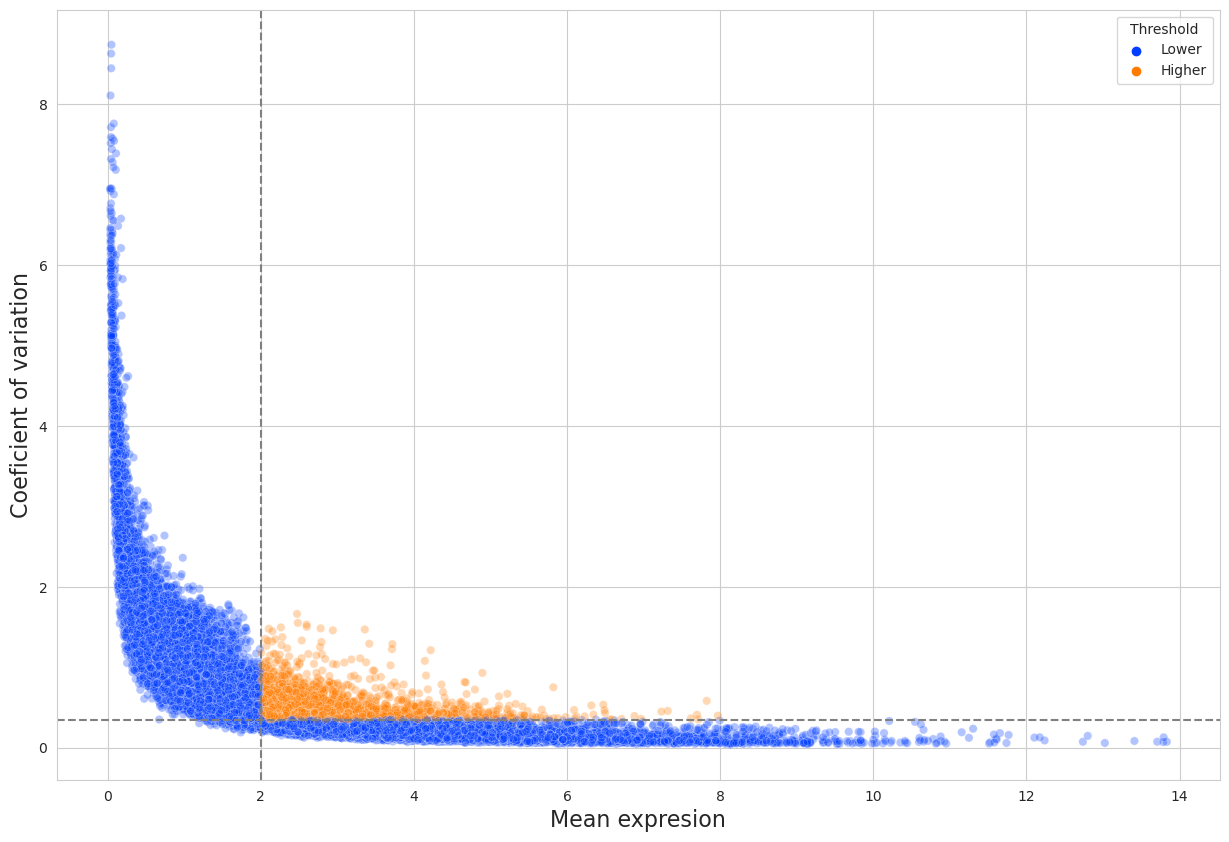

In [7]:

matplotlib.pyplot.figure(figsize = (15, 10))
seaborn.set_style('whitegrid')

mean_mean = 2
CV_mean = 0.35

value = (subset['Mean'] > mean_mean) & (subset['CV'] > CV_mean)
subset['Threshold']= numpy.where( value == True , 'Higher', 'Lower')


seaborn.scatterplot(x = subset['Mean'], y = subset['CV'], hue = subset['Threshold'], palette = 'bright', alpha = .3)

matplotlib.pyplot.axhline(y = CV_mean, color = 'grey', linestyle = '--')
matplotlib.pyplot.axvline(x = mean_mean, color = 'grey', linestyle = '--')

matplotlib.pyplot.ylabel('Coeficient of variation', fontsize = 16)
matplotlib.pyplot.xlabel('Mean expresion',fontsize = 16)
print('Deleted: ', len(subset[subset['Threshold']=='Lower']))
print('Slected: ', len(subset[subset['Threshold']=='Higher']))
matplotlib.pyplot.savefig('/home/marti/jupy/jup_notebook/Project/result/Graphs/genes_selected.png')

## Safe the selected genes on a diferent dataframe and safe it

In [8]:
df_definitive = df_sel[subset['Threshold']=='Higher']
df_definitive

,patient1,patient2,patient3,patient4,patient5,patient6,patient7,patient8,patient9,patient10,...,patient241,patient242,patient243,patient244,patient245,patient246,patient247,patient248,patient249,patient250
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000001084.13,4.617637,4.503940,5.194146,4.322596,3.322603,7.506739,2.874130,3.649201,5.580813,5.326127,...,3.287854,7.025930,3.055459,3.157592,5.849398,4.581263,2.307183,2.154292,2.893826,6.601768
ENSG00000001626.16,1.071716,3.135957,3.630548,2.143734,4.113688,0.751025,3.070126,0.346049,1.467708,4.057369,...,4.813542,3.955703,4.735911,2.077072,2.956027,1.297660,4.734631,4.176099,4.620442,1.066616
ENSG00000002587.10,3.520342,3.528571,4.155267,1.917484,2.020111,3.125043,3.179170,4.442288,4.289122,3.198561,...,0.664042,2.015742,1.217823,2.201269,3.640980,3.553032,0.732874,1.163525,0.614247,3.057624
ENSG00000002726.21,6.080249,6.512193,0.895124,4.200270,2.592747,1.343314,1.575214,6.511214,5.508753,0.049855,...,0.304088,0.350703,0.589150,3.217179,0.471715,1.234434,0.127802,0.112562,0.182851,0.108961
ENSG00000003249.15,5.052195,4.095007,3.290826,4.989458,3.281473,6.388664,5.176979,4.962588,4.460295,0.490565,...,0.469839,0.592365,0.552254,1.515389,1.119932,1.799332,0.448571,0.748276,0.568938,0.273019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286904.1,2.080611,4.219826,2.339958,0.797147,2.962322,1.549904,1.732210,1.325597,1.880436,0.614406,...,0.461256,1.683470,0.970613,0.863835,0.824444,1.168645,0.932919,0.713235,0.662049,1.842264
ENSG00000286912.1,2.333726,1.091158,2.256661,1.667929,1.576128,0.935277,0.557292,1.223921,2.061213,5.961640,...,3.889351,3.898997,5.296737,4.455058,4.177918,4.556341,5.860676,5.767313,5.753783,3.669406
ENSG00000287024.1,3.362958,4.183249,1.278503,5.190297,2.991144,4.051842,1.552924,4.588400,2.290340,0.000000,...,1.418570,0.827722,1.362768,3.680957,0.616859,0.951296,0.873050,1.134069,1.182081,0.796379


In [9]:
df_definitive.to_csv('/home/marti/jupy/jup_notebook/Project/result/genes_selected.csv', index=True, sep='\t')